In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\Kartik DataScience\Python\Assignment 14\Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Undergrad'])
df['Undergrad'] = label_encoder.transform(df['Undergrad'])
label_encoder.fit(df['Marital.Status'])
df['Marital.Status'] = label_encoder.transform(df['Marital.Status'])
label_encoder.fit(df['Urban'])
df['Urban'] = label_encoder.transform(df['Urban'])

In [6]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [8]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


In [9]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


<Axes: >

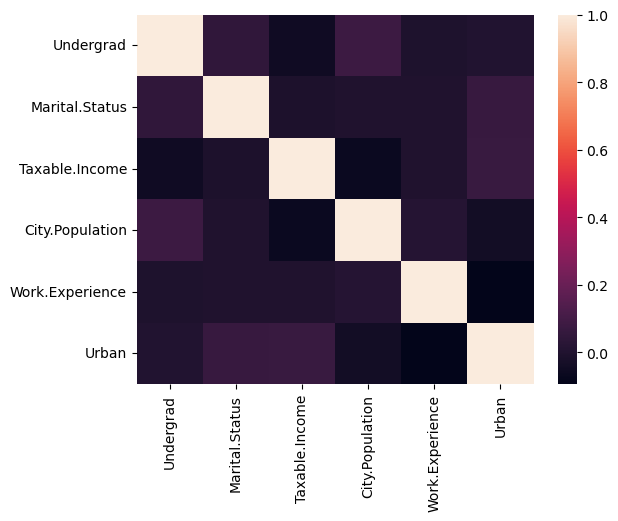

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

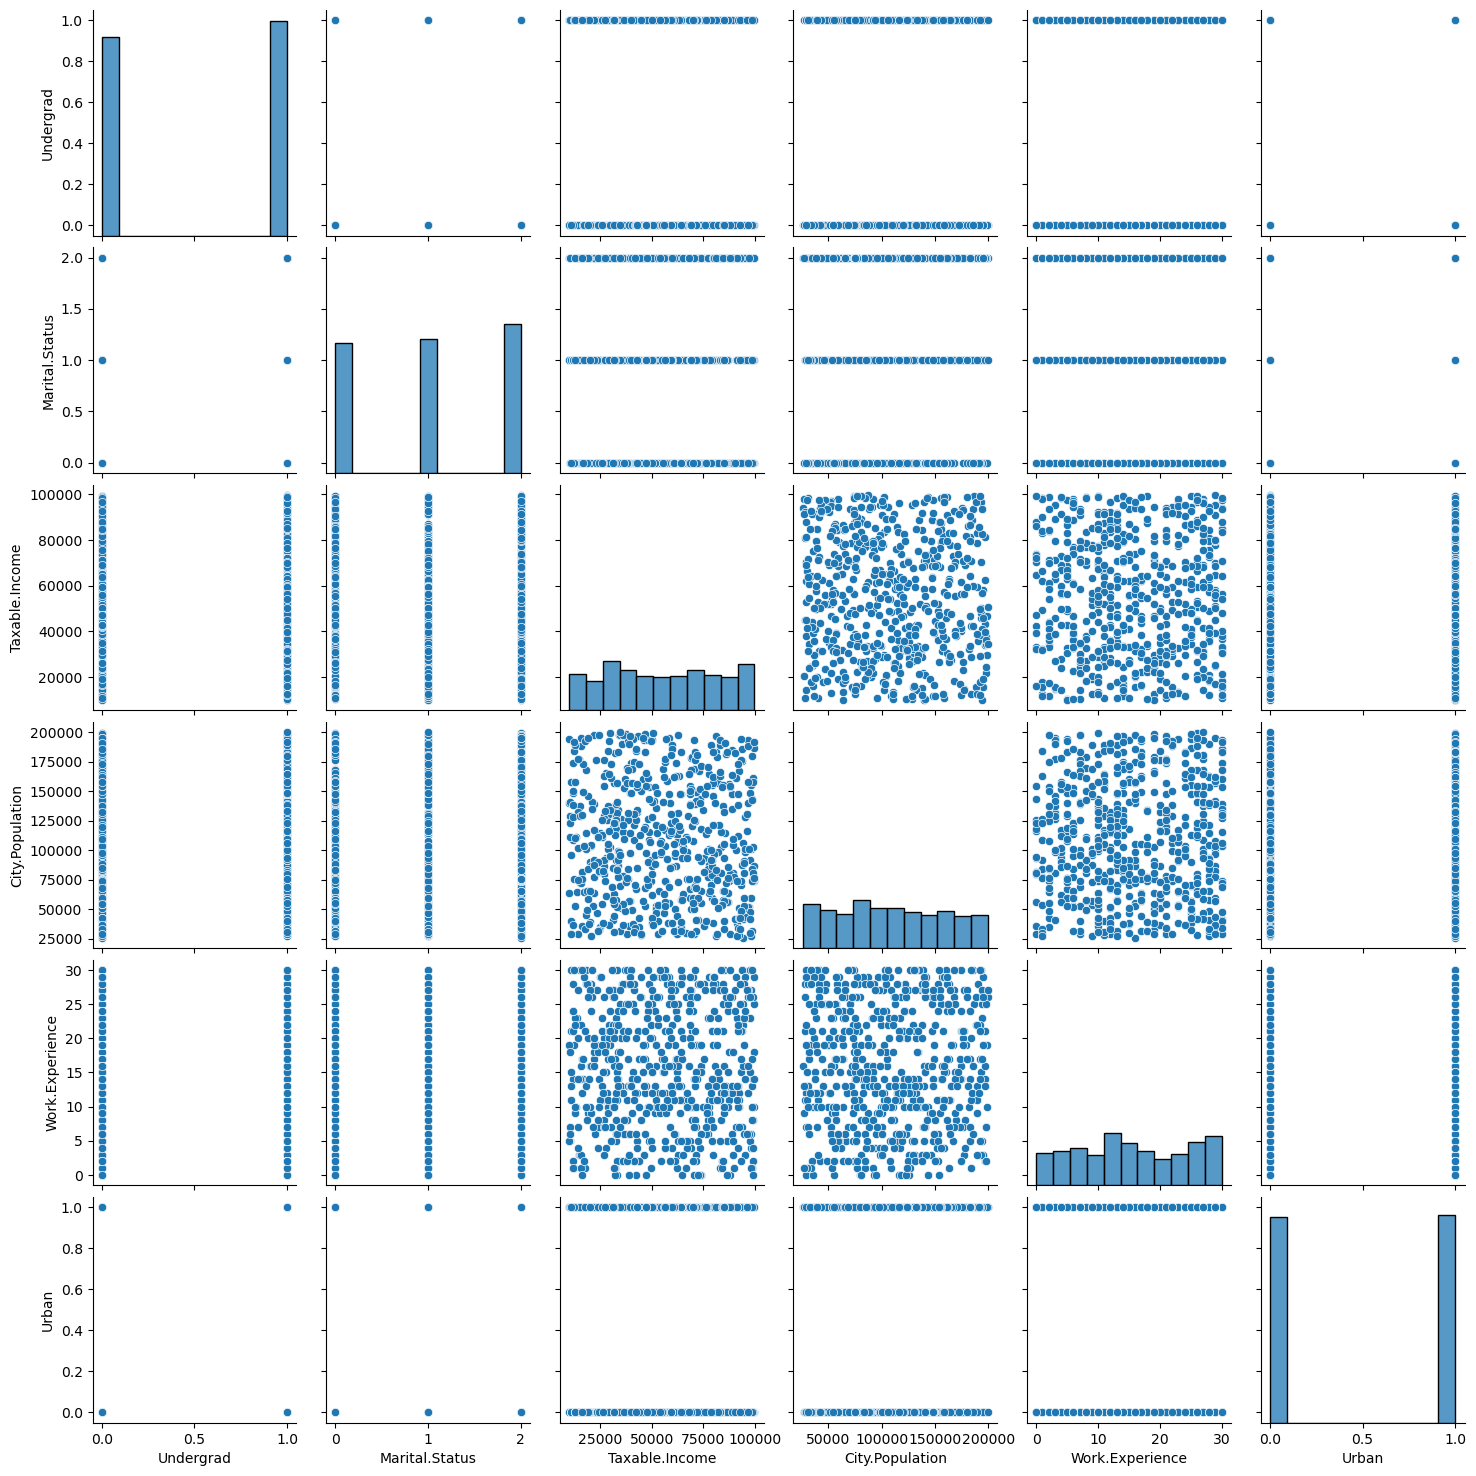

In [15]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [77]:
df['Risk'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df.head(11)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [78]:
y=df['Risk']
X=df.drop(['Taxable.Income','Risk'],axis=1)

In [79]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Risk, Length: 600, dtype: object

In [80]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [81]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [82]:
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=41)

In [83]:
Xtrain.shape

(480, 5)

In [84]:
xtest.shape

(120, 5)

In [85]:
ytrain.shape

(480,)

In [86]:
ytest.shape

(120,)

In [87]:
dtc=DecisionTreeClassifier()
model=dtc.fit(Xtrain,ytrain)

In [105]:
y_pred=model.predict(xtest)
y_pred

array(['Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy=accuracy_score(y_pred,ytest)

In [108]:
accuracy

0.6666666666666666

In [109]:
import matplotlib.pyplot as plt

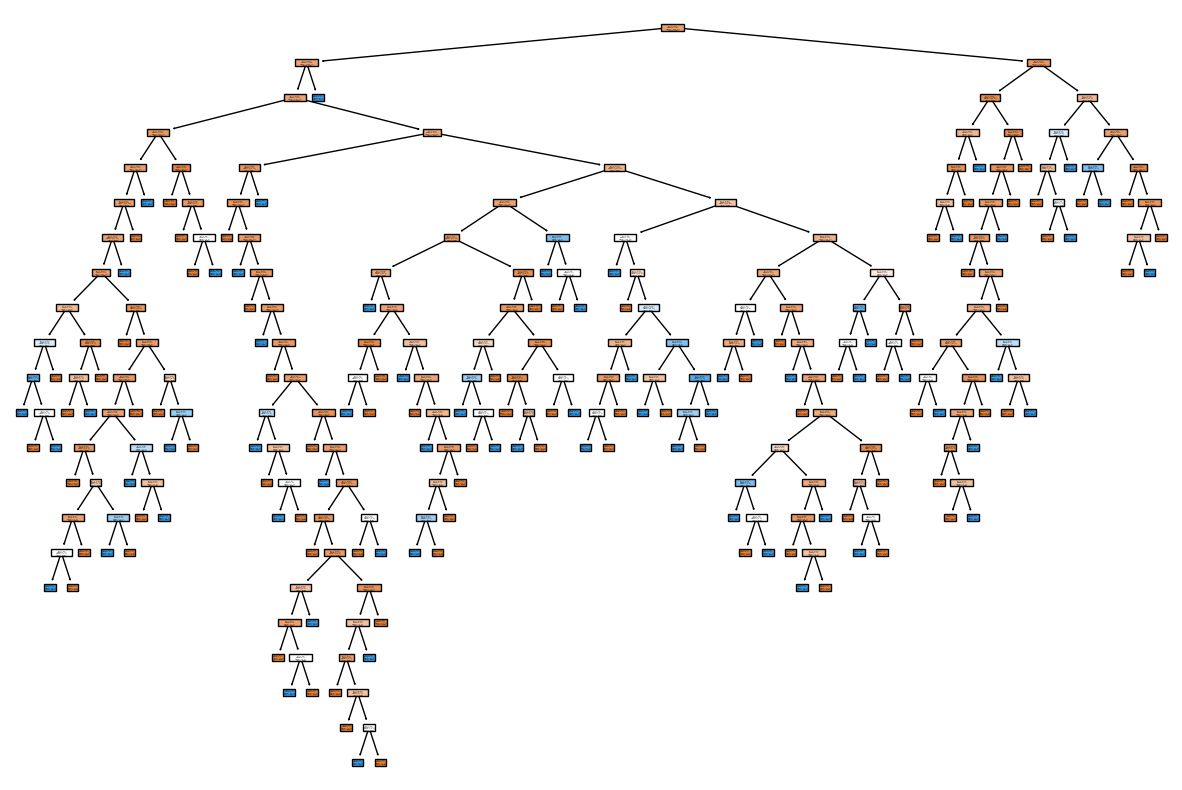

In [110]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()